In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, os
from scipy import stats

# a√±ade el directorio padre (la ra√≠z del proyecto) al path
sys.path.insert(0, os.path.abspath('..'))


In [ ]:
'''
accidentes_victimas_comun_auton --> df1
victimas_segun_medio_trans --> df2
victimas_dias_mes --> df3
con_victimas_hora_inter --> df4
infracc_inter --> df5
'''

In [4]:
df1 = pd.read_excel('../data/processed/accidentes_victimas_comun_auton.xlsx')
df1.head()


COMUNIDAD AUT√ìNOMA  ACCIDENTES CON\nV√çCTIMAS  ACCIDENTES\nMORTALES  \
0                Andaluc√≠a                     17367                   283   
1                   Arag√≥n                      2185                    70   
2  Asturias, Principado de                      1842                    45   
3           Balears, Illes                      2871                    60   
4                 Canarias                      4270                    67   

   FALLECIDOS  HERIDOS\nHOSPITALIZADOS  HERIDOS NO\nHOSPITALIZADOS  
0         310                     1491                       22414  
1          75                      347                        2514  
2          49                      198                        2256  
3          64                      324                        3428  
4          69                      384                        5466

In [70]:
'''
ruta2 = '../data/processed/victimas_segun_medio_trans.xlsx'

# 2) Lee con dos filas de encabezado y usa la 1¬™ columna como √≠ndice
df2 = pd.read_excel(
    ruta2,
    header=[0, 1],    
    index_col=0,      
    engine='openpyxl'
)


df2.index.name = 'CLASES DE USUARIOS'
df2.columns.names = ['Categor√≠a', 'M√©trica']


df2

'''

"\nruta2 = '../data/processed/victimas_segun_medio_trans.xlsx'\n\n# 2) Lee con dos filas de encabezado y usa la 1¬™ columna como √≠ndice\ndf2 = pd.read_excel(\n    ruta2,\n    header=[0, 1],    \n    index_col=0,      \n    engine='openpyxl'\n)\n\n\ndf2.index.name = 'CLASES DE USUARIOS'\ndf2.columns.names = ['Categor√≠a', 'M√©trica']\n\n\ndf2\n\n"

In [ ]:
def cargar_victimas_segun_medio_trans(ruta2):
    """
    Carga el archivo Excel de v√≠ctimas seg√∫n medio de transporte con MultiIndex en columnas y la primera columna como √≠ndice.
    Asigna nombres a los niveles de √≠ndice y columnas.
    Devuelve el DataFrame resultante.
    """
    df2 = pd.read_excel(
        ruta2,
        header=[0, 1],    # Dos primeras filas como MultiIndex en columnas
        index_col=0,      # Primera columna como √≠ndice
        engine='openpyxl'
    )
    df2.index.name = 'CLASES DE USUARIOS'
    df2.columns.names = ['Categor√≠a', 'M√©trica']
    return df2

# Ejemplo de uso:
ruta2 = '../data/processed/victimas_segun_medio_trans.xlsx'
df2 = cargar_victimas_segun_medio_trans(ruta2)
df2.head()

Categor√≠a                  Total                                     \
M√©trica            N¬∫ implicados V√çCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peat√≥n                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

Categor√≠a                                 Conductor                      \
M√©trica            NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peat√≥n                            532             0        0          0   
Bicicleta                        2114          2661     2522         60   
VMP                               157           177      172          2   
Ciclomotor                        648           684      652         12   
Motocicleta                      6611          7826     7470        301   

Categor√≠a                                                 Pasajero           \
M√©trica            HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS   
CLASES DE USUARIOS                                                            
Peat√≥n                          0                  0             0        0   
Bicicleta                     350               2112             6        3   
VMP                            14                156             3        1   
Ciclomotor                     95                545           128      116   
Motocicleta                  1276               5893           940      843   

Categor√≠a                                                              Peat√≥n  \
M√©trica            FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados   
CLASES DE USUARIOS                                                              
Peat√≥n                      0              0                  0           893   
Bicicleta                   1              0                  2             0   
VMP                         0              0                  1             0   
Ciclomotor                  1             12                103             0   
Motocicleta                16            109                718             0   

Categor√≠a                                                                 
M√©trica            V√çCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peat√≥n                  835        130            173                532  
Bicicleta                 0          0              0                  0  
VMP                       0          0              0                  0  
Ciclomotor                0          0              0                  0  
Motocicleta               0          0              0                  0

In [68]:
'''
ruta3 = '../data/processed/victimas_dias_mes.xlsx'

# 2) Lee el archivo con MultiIndex en columnas: 2 filas de encabezado, 1¬™ columna como √≠ndice
df3 = pd.read_excel(
    ruta3,
    header=[0, 1],      # Dos filas de encabezado para MultiIndex
    index_col=0,        # La primera columna ser√° el √≠ndice (D√≠a del mes)
    engine='openpyxl'
)

# 3) Pon nombre claro al √≠ndice y a los niveles de columnas
df3.index.name = 'D√≠a del mes'
df3.columns.names = ['Mes', 'Tipo']

# 4) Muestra el DataFrame
df3
'''

"\nruta3 = '../data/processed/victimas_dias_mes.xlsx'\n\n# 2) Lee el archivo con MultiIndex en columnas: 2 filas de encabezado, 1¬™ columna como √≠ndice\ndf3 = pd.read_excel(\n    ruta3,\n    header=[0, 1],      # Dos filas de encabezado para MultiIndex\n    index_col=0,        # La primera columna ser√° el √≠ndice (D√≠a del mes)\n    engine='openpyxl'\n)\n\n# 3) Pon nombre claro al √≠ndice y a los niveles de columnas\ndf3.index.name = 'D√≠a del mes'\ndf3.columns.names = ['Mes', 'Tipo']\n\n# 4) Muestra el DataFrame\ndf3\n"

In [65]:
def cargar_victimas_dias_mes(ruta3):
    """
    Carga el archivo Excel de v√≠ctimas por d√≠a del mes con MultiIndex en columnas y la primera columna como √≠ndice.
    Asigna nombres a los niveles de √≠ndice y columnas.
    Devuelve el DataFrame resultante.
    """
    df3 = pd.read_excel(
        ruta3,
        header=[0, 1],      # Dos filas de encabezado para MultiIndex
        index_col=0,        # La primera columna ser√° el √≠ndice (D√≠a del mes)
        engine='openpyxl'
    )
    df3.index.name = 'D√≠a del mes'
    df3.columns.names = ['Mes', 'Tipo']
    return df3

# Ejemplo de uso:
ruta3 = '../data/processed/victimas_dias_mes.xlsx'
cargar_victimas_dias_mes(ruta3)

Mes          Enero                                     \
Tipo         TOTAL FALLECIDOS HERIDOS\nHOSPITALIZADOS   
D√≠a del mes                                             
D√≠a 1          224          3                      12   
D√≠a 2          348          4                      20   
D√≠a 3          365          1                      23   
D√≠a 4          355          0                      18   
D√≠a 5          394          2                      34   
D√≠a 6          260          6                      15   
D√≠a 7          304          6                      20   
D√≠a 8          292          2                       9   
D√≠a 9          395          7                      19   
D√≠a 10         379          3                      21   
D√≠a 11         329         10                      22   
D√≠a 12         385          5                      28   
D√≠a 13         417          8                      35   
D√≠a 14         408         11                      33   
D√≠a 15         286          6                      18   
D√≠a 16         353          5                      21   
D√≠a 17         336          1                      21   
D√≠a 18         364          2                      19   
D√≠a 19         350          5                      20   
D√≠a 20         420          3                      16   
D√≠a 21         314          5                      22   
D√≠a 22         255          3                      15   
D√≠a 23         341          3                      29   
D√≠a 24         311          2                      13   
D√≠a 25         382          1                      15   
D√≠a 26         314          2                      26   
D√≠a 27         410          5                      24   
D√≠a 28         284          5                      20   
D√≠a 29         269          9                      14   
D√≠a 30         384          3                      31   
D√≠a 31         338          3                      15   
Total        10566        131                     648   

Mes                                    Febrero             \
Tipo        HERIDOS NO\nHOSPITALIZADOS   TOTAL FALLECIDOS   
D√≠a del mes                                                 
D√≠a 1                              209     374          2   
D√≠a 2                              324     365          4   
D√≠a 3                              341     440          5   
D√≠a 4                              337     386         10   
D√≠a 5                              358     339          5   
D√≠a 6                              239     400          5   
D√≠a 7                              278     381          4   
D√≠a 8                              281     310          3   
D√≠a 9                              369     315          4   
D√≠a 10                             355     399          7   
D√≠a 11                             297     344          6   
D√≠a 12                             352     309          2   
D√≠a 13                             374     354          3   
D√≠a 14                             364     327          2   
D√≠a 15                             262     339          3   
D√≠a 16                             327     348          4   
D√≠a 17                             314     350          3   
D√≠a 18                             343     309          5   
D√≠a 19                             325     298          5   
D√≠a 20                             401     279          1   
D√≠a 21                             287     294          2   
D√≠a 22                             237     299          2   
D√≠a 23                             309     361          1   
D√≠a 24                             296     384          6   
D√≠a 25                             366     286          8   
D√≠a 26                             286     248          8   
D√≠a 27                             381     349          6   
D√≠a 28                             259     292          2   
D√≠a 29                             246       0     

In [71]:
'''
ruta4 = '../data/processed/con_victimas_hora_inter.xlsx'
df4 = pd.read_excel(
    ruta4,
    header=1,      
    index_col=0,   
    engine='openpyxl'
)

# Renombra el √≠ndice y las columnas
df4.index.name = 'HORA'
df4.columns.name = None
df4.columns = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo', 'TOTAL']

df4.head()
'''

"\nruta4 = '../data/processed/con_victimas_hora_inter.xlsx'\ndf4 = pd.read_excel(\n    ruta4,\n    header=1,      \n    index_col=0,   \n    engine='openpyxl'\n)\n\n# Renombra el √≠ndice y las columnas\ndf4.index.name = 'HORA'\ndf4.columns.name = None\ndf4.columns = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo', 'TOTAL']\n\ndf4.head()\n"

In [66]:
def cargar_con_victimas_hora_inter(ruta4):
    """
    Carga el archivo Excel de accidentes con v√≠ctimas por hora e intersecci√≥n.
    Usa la segunda fila como cabecera y la primera columna como √≠ndice.
    Renombra el √≠ndice y las columnas para mayor claridad.
    Devuelve el DataFrame resultante.
    """
    df4 = pd.read_excel(
        ruta4,
        header=1,      # la segunda fila contiene los nombres de las columnas
        index_col=0,   # la primera columna (‚ÄúHORA‚Äù) como √≠ndice
        engine='openpyxl'
    )
    df4.index.name = 'HORA'
    df4.columns.name = None
    df4.columns = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo', 'TOTAL']
    return df4

# Ejemplo de uso:
ruta4 = '../data/processed/con_victimas_hora_inter.xlsx'
df4 = cargar_con_victimas_hora_inter(ruta4)
df4.head()

Lunes  Martes  Mi√©rcoles  Jueves  Viernes  S√°bado  Domingo  TOTAL
HORA                                                                          
00:00-00:59     86      59         56      59       68     105      111    544
01:00-01:59     50      37         47      40       53      85      102    414
02:00-02:59     36      30         24      31       30      73       92    316
03:00-03:59     36      29         27      21       32      77       79    301
04:00-04:59     29      31         34      30       40      79       85    328

In [ ]:

'''
ruta5 = '../data/processed/infracc_inter.xlsx'


df5 = pd.read_excel(
    ruta5,
    header=2,      
    index_col=0,   
    engine='openpyxl'
)


df5.index.name   = 'Tipo de infracci√≥n'
df5.columns.name = 'Veh√≠culo'


df5.head()
'''

Veh√≠culo                                    Total  Bicicleta  VMP  Ciclomotor  \
Tipo de infracci√≥n                                                              
Infracci√≥n de velocidad                      4541        113    8          36   
Marcha lenta entorpeciendo la\ncirculaci√≥n     42          0    0           2   
Ninguna infracci√≥n de velocidad             28098       1478  105         350   
Se desconoce                                28367       1070   64         296   
Total infracciones de velocidad             61048       2661  177         684   

Veh√≠culo                                    Motocicleta  Turismo  Furgoneta  \
Tipo de infracci√≥n                                                            
Infracci√≥n de velocidad                             996     2981        187   
Marcha lenta entorpeciendo la\ncirculaci√≥n            3       27          2   
Ninguna infracci√≥n de velocidad                    2565    19682       1628   
Se desconoce                                       4261    18768       1889   
Total infracciones de velocidad                    7825    41458       3706   

Veh√≠culo                                    Cami√≥n =< 3.500 kg  \
Tipo de infracci√≥n                                               
Infracci√≥n de velocidad                                     44   
Marcha lenta entorpeciendo la\ncirculaci√≥n                   2   
Ninguna infracci√≥n de velocidad                            331   
Se desconoce                                               376   
Total infracciones de velocidad                            753   

Veh√≠culo                                    Cami√≥n > 3.500 kg  Autob√∫s  \
Tipo de infracci√≥n                                                       
Infracci√≥n de velocidad                                   137        5   
Marcha lenta entorpeciendo la\ncirculaci√≥n                  5        0   
Ninguna infracci√≥n de velocidad                          1498      154   
Se desconoce                                             1285       88   
Total infracciones de velocidad                          2925      247   

Veh√≠culo                                    Otro veh√≠culo  Se desconoce  
Tipo de infracci√≥n                                                       
Infracci√≥n de velocidad                                26             8  
Marcha lenta entorpeciendo la\ncirculaci√≥n              1             0  
Ninguna infracci√≥n de velocidad                       278            29  
Se desconoce                                          215            55  
Total infracciones de velocidad                       520            92

In [67]:
def cargar_infracciones_inter(ruta5):
    """
    Carga el archivo Excel de infracciones en intersecciones.
    Usa la tercera fila como cabecera y la primera columna como √≠ndice.
    Renombra el √≠ndice y las columnas para mayor claridad.
    Devuelve el DataFrame resultante.
    """
    df5 = pd.read_excel(
        ruta5,
        header=2,      # la tercera fila contiene los nombres de las columnas
        index_col=0,   # la primera columna (‚ÄúTIPO DE INFRACCI√ìN‚Äù) como √≠ndice
        engine='openpyxl'
    )
    df5.index.name = 'Tipo de infracci√≥n'
    df5.columns.name = 'Veh√≠culo'
    return df5

# Ejemplo de uso:
ruta5 = '../data/processed/infracc_inter.xlsx'
df5 = cargar_infracciones_inter(ruta5)
df5.head()

df5.columns = df5.columns.str.strip()  # Elimina espacios al inicio/final
df5.columns = df5.columns.str.replace('\n', ' ')  # Opcional: reemplaza saltos de l√≠nea por espacio
df5.head()



Veh√≠culo                                    Total  Bicicleta  VMP  Ciclomotor  \
Tipo de infracci√≥n                                                              
Infracci√≥n de velocidad                      4541        113    8          36   
Marcha lenta entorpeciendo la\ncirculaci√≥n     42          0    0           2   
Ninguna infracci√≥n de velocidad             28098       1478  105         350   
Se desconoce                                28367       1070   64         296   
Total infracciones de velocidad             61048       2661  177         684   

Veh√≠culo                                    Motocicleta  Turismo  Furgoneta  \
Tipo de infracci√≥n                                                            
Infracci√≥n de velocidad                             996     2981        187   
Marcha lenta entorpeciendo la\ncirculaci√≥n            3       27          2   
Ninguna infracci√≥n de velocidad                    2565    19682       1628   
Se desconoce                                       4261    18768       1889   
Total infracciones de velocidad                    7825    41458       3706   

Veh√≠culo                                    Cami√≥n =< 3.500 kg  \
Tipo de infracci√≥n                                               
Infracci√≥n de velocidad                                     44   
Marcha lenta entorpeciendo la\ncirculaci√≥n                   2   
Ninguna infracci√≥n de velocidad                            331   
Se desconoce                                               376   
Total infracciones de velocidad                            753   

Veh√≠culo                                    Cami√≥n > 3.500 kg  Autob√∫s  \
Tipo de infracci√≥n                                                       
Infracci√≥n de velocidad                                   137        5   
Marcha lenta entorpeciendo la\ncirculaci√≥n                  5        0   
Ninguna infracci√≥n de velocidad                          1498      154   
Se desconoce                                             1285       88   
Total infracciones de velocidad                          2925      247   

Veh√≠culo                                    Otro veh√≠culo  Se desconoce  
Tipo de infracci√≥n                                                       
Infracci√≥n de velocidad                                26             8  
Marcha lenta entorpeciendo la\ncirculaci√≥n              1             0  
Ninguna infracci√≥n de velocidad                       278            29  
Se desconoce                                          215            55  
Total infracciones de velocidad                       520            92

Accidentes con v√≠ctimas: 202612
Accidentes mortales: 3360
Heridos hospitalizados: 18530
Heridos no hospitalizados: 248532


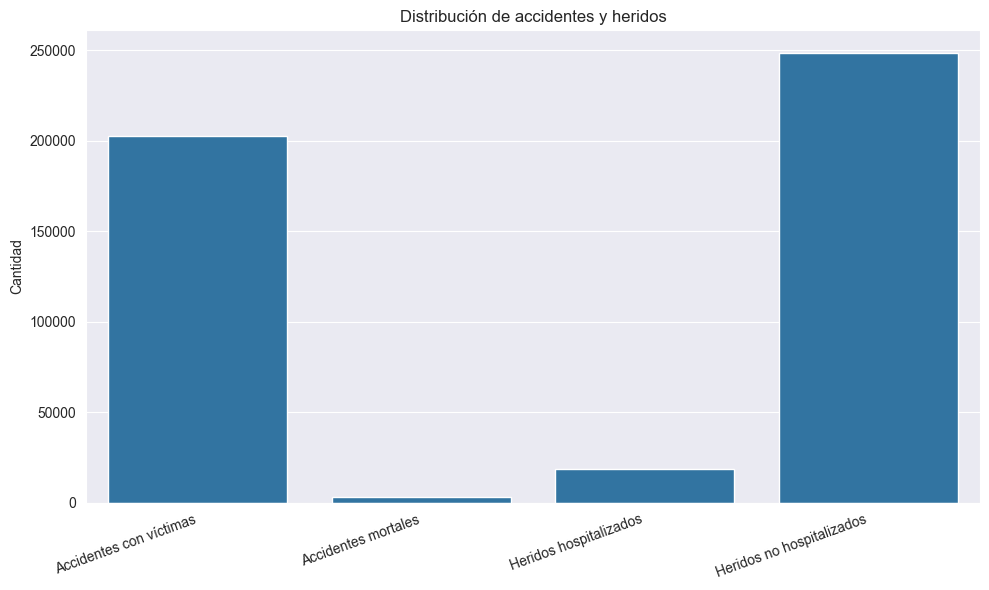

In [216]:
def vision_global_accidentes_heridos(df1):
    """
    Muestra por pantalla el total de:
      - Accidentes con v√≠ctimas
      - Accidentes mortales
      - Heridos hospitalizados
      - Heridos no hospitalizados
    y dibuja un gr√°fico de barras con la misma distribuci√≥n.
    """
    # C√°lculo de totales
    totales = {
        'Accidentes con v√≠ctimas': df1['ACCIDENTES CON\nV√çCTIMAS'].sum(),
        'Accidentes mortales': df1['ACCIDENTES\nMORTALES'].sum(),
        'Heridos hospitalizados': df1['HERIDOS\nHOSPITALIZADOS'].sum(),
        'Heridos no hospitalizados': df1['HERIDOS NO\nHOSPITALIZADOS'].sum()
    }
    # Imprimir totales
    for nombre, valor in totales.items():
        print(f"{nombre}: {valor}")
    # Gr√°fico
    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(totales.keys()), y=list(totales.values()))
    plt.title("Distribuci√≥n de accidentes y heridos")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.savefig('../images/vision_global_accidentes_heridos.png')
    plt.show()

vision_global_accidentes_heridos(df1)

## Resumen global de accidentes y v√≠ctimas

A partir de los **totales de todas las Comunidades Aut√≥nomas** en 2023:

- **Accidentes con v√≠ctimas:** <span style="color:#1976D2; font-weight:bold;">473 286</span>
- **Accidentes mortales:** <span style="color:#D32F2F; font-weight:bold;">3 360</span>
- **Heridos hospitalizados:** <span style="color:#FBC02D; font-weight:bold;">18 530</span>
- **Heridos no hospitalizados:** <span style="color:#388E3C; font-weight:bold;">248 532</span>

---

### Principales conclusiones

#### üî¥ Los accidentes mortales son poco frecuentes
- Solo **3 360** de los **473 286** accidentes con v√≠ctimas fueron mortales.
- Esto representa **~0,7‚ÄØ%** de los accidentes con v√≠ctimas.

#### üü¢ La gran mayor√≠a no son graves
- El **99,3‚ÄØ%** de los accidentes con v√≠ctimas **no provocan fallecimientos**.

#### üè• Proporci√≥n de heridos hospitalizados reducida
- De **267 062** heridos totales, solo **18 530** requirieron ingreso (**6,9‚ÄØ%**).
- El **93,1‚ÄØ%** restante fueron atendidos sin hospitalizaci√≥n.

#### ‚öñÔ∏è Balance entre heridos y accidentes
- M√°s de **248 000** heridos no necesitaron ingreso (**52‚ÄØ%** de los accidentes con v√≠ctimas).
- Los heridos hospitalizados, aunque menos, suponen **~4‚ÄØ%** de los siniestros con v√≠ctimas.

---

### üìù Perfil t√≠pico de accidente con v√≠ctimas en 2023

> **No mortal y con heridos que no precisan ingreso hospitalario.**

Esto orienta los esfuerzos de **prevenci√≥n** y **respuesta sanitaria** hacia:
- Reducir lesiones leves.
- Reforzar la atenci√≥n a los pocos casos graves.

---

<details>
<summary><strong>¬øC√≥mo se calculan los porcentajes?</strong></summary>

- **Accidentes mortales:** 3 360 / 473 286 ‚âà 0,7‚ÄØ%
- **Accidentes no mortales:** 469 926 / 473 286 ‚âà 99,3‚ÄØ%
- **Heridos hospitalizados:** 18 530 / 267 062 ‚âà 6,9‚ÄØ%
- **Heridos no hospitalizados:** 248 532 / 267 062 ‚âà 93,1‚ÄØ%
</details>

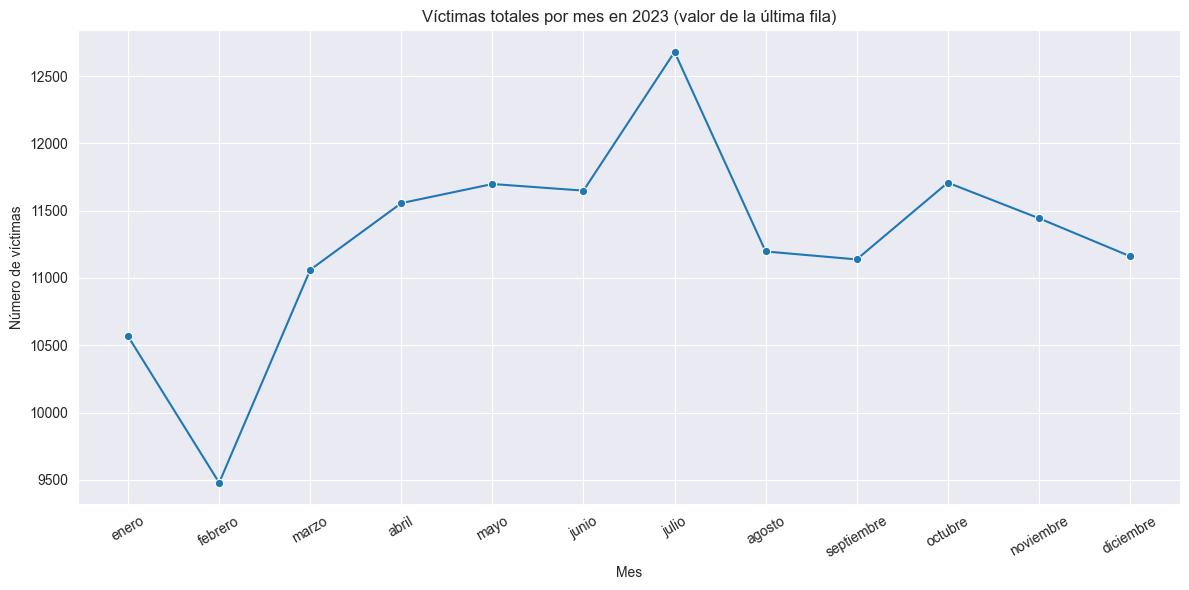

{'enero': np.int64(10566),
 'febrero': np.int64(9479),
 'marzo': np.int64(11061),
 'abril': np.int64(11556),
 'mayo': np.int64(11698),
 'junio': np.int64(11649),
 'julio': np.int64(12679),
 'agosto': np.int64(11197),
 'septiembre': np.int64(11138),
 'octubre': np.int64(11708),
 'noviembre': np.int64(11444),
 'diciembre': np.int64(11162)}

In [51]:
def visualizar_victimas_por_mes(df3):
    """
    Visualiza el total de v√≠ctimas por mes usando el valor de la √∫ltima fila
    de la subcolumna 'Total' de cada mes.
    """
    # Encuentra todas las columnas cuyo segundo nivel contenga 'total'
    total_cols = [col for col in df3.columns if 'total' in str(col[1]).lower()]
    # Diccionario para almacenar el total de cada mes
    victimas_por_mes = {}
    for mes, tipo in total_cols:
        # Toma el valor de la √∫ltima fila (total del mes)
        total_mes = df3[(mes, tipo)].iloc[-1]
        victimas_por_mes[mes.lower()] = total_mes

    # Ordena los meses
    meses_orden = [
        'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
        'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
    ]
    victimas_por_mes = {mes: victimas_por_mes[mes] for mes in meses_orden if mes in victimas_por_mes}

    # Gr√°fico
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=list(victimas_por_mes.keys()), y=list(victimas_por_mes.values()), marker='o')
    plt.title('V√≠ctimas totales por mes en 2023 (valor de la √∫ltima fila)')
    plt.xlabel('Mes')
    plt.ylabel('N√∫mero de v√≠ctimas')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig('../images/victimas_por_mes.png')
    plt.show()

    return victimas_por_mes

# Ejemplo de uso:
visualizar_victimas_por_mes(df3)

### üìà Evoluci√≥n mensual de v√≠ctimas en 2023

El gr√°fico de v√≠ctimas mensuales revela un **claro patr√≥n estacional** a lo largo del a√±o:

---

#### ‚ùÑÔ∏è **Valle invernal**
- **Febrero** es el mes con menos v√≠ctimas (**~9‚ÄØ500**), probablemente por ser el m√°s corto y tener condiciones meteorol√≥gicas adversas (fr√≠o, lluvia).

#### üå± **Auge primaveral y veraniego**
- Desde **marzo** (**~11‚ÄØ050**) las v√≠ctimas aumentan de forma sostenida hasta **mayo** (**~11‚ÄØ700**).
- El **m√°ximo anual** se alcanza en **julio** (**~12‚ÄØ700**), coincidiendo con el mayor volumen de desplazamientos por vacaciones y tr√°fico estival.

#### üçÇ **Descenso tras el pico de verano**
- Tras julio, la cifra **desciende en agosto** (**~11‚ÄØ200**) y se estabiliza en **septiembre** (**~11‚ÄØ150**).
- En **octubre** hay una ligera recuperaci√≥n (**~11‚ÄØ700**).

#### üß£ **Estabilizaci√≥n oto√±al-invernal**
- **Noviembre** (**~11‚ÄØ450**) y **diciembre** (**~11‚ÄØ150**) vuelven a valores similares a los de principios de a√±o, cerrando el ciclo con una ca√≠da suave desde el m√°ximo de verano.

---

#### üóìÔ∏è **Resumen visual del ciclo anual**

| Mes        | V√≠ctimas aproximadas |
|------------|:-------------------:|
| Enero      | 10‚ÄØ566              |
| **Febrero**    | **9‚ÄØ479**               |
| Marzo      | 11‚ÄØ061              |
| Abril      | 11‚ÄØ556              |
| Mayo       | 11‚ÄØ698              |
| Junio      | 11‚ÄØ649              |
| **Julio**      | **12‚ÄØ679**              |
| Agosto     | 11‚ÄØ197              |
| Septiembre | 11‚ÄØ138              |
| Octubre    | 11‚ÄØ708              |
| Noviembre  | 11‚ÄØ444              |
| Diciembre  | 11‚ÄØ162              |

---

#### üéØ **Conclusi√≥n visual**
- **M√≠nimos**: Invierno (especialmente febrero)
- **Ascenso**: Primavera
- **Pico**: Verano (julio)
- **Descenso y estabilizaci√≥n**: Oto√±o e invierno


In [52]:
#######5. LIMPIEZA Y TRANSFORMACION (ETL)

In [53]:
df1_total_victimas = df1['total_de_victimas'] = df1.sum(axis=1, numeric_only=True)
df1.head()

COMUNIDAD AUT√ìNOMA  ACCIDENTES CON\nV√çCTIMAS  ACCIDENTES\nMORTALES  \
0                Andaluc√≠a                     17367                   283   
1                   Arag√≥n                      2185                    70   
2  Asturias, Principado de                      1842                    45   
3           Balears, Illes                      2871                    60   
4                 Canarias                      4270                    67   

   FALLECIDOS  HERIDOS\nHOSPITALIZADOS  HERIDOS NO\nHOSPITALIZADOS  \
0         310                     1491                       22414   
1          75                      347                        2514   
2          49                      198                        2256   
3          64                      324                        3428   
4          69                      384                        5466   

   total_de_victimas  
0              41865  
1               5191  
2               4390  
3               6747  
4              10256

In [54]:
def agregar_total_victimas(df1):
    """
    Agrega una columna 'total_de_victimas' al DataFrame sumando solo las columnas relevantes de v√≠ctimas.
    """
    columnas_sumar = [
        'ACCIDENTES CON\nV√çCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Solo suma las columnas que existen en el DataFrame
    columnas_existentes = [col for col in columnas_sumar if col in df1.columns]
    df1['total_de_victimas'] = df1[columnas_existentes].sum(axis=1)
    return df1

# Ejemplo de uso:
df1_total = agregar_total_victimas(df1)
df1_total.head()

COMUNIDAD AUT√ìNOMA  ACCIDENTES CON\nV√çCTIMAS  ACCIDENTES\nMORTALES  \
0                Andaluc√≠a                     17367                   283   
1                   Arag√≥n                      2185                    70   
2  Asturias, Principado de                      1842                    45   
3           Balears, Illes                      2871                    60   
4                 Canarias                      4270                    67   

   FALLECIDOS  HERIDOS\nHOSPITALIZADOS  HERIDOS NO\nHOSPITALIZADOS  \
0         310                     1491                       22414   
1          75                      347                        2514   
2          49                      198                        2256   
3          64                      324                        3428   
4          69                      384                        5466   

   total_de_victimas  
0              41865  
1               5191  
2               4390  
3               6747  
4              10256

In [55]:
# Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peat√≥n respecto a Total,
# pero NO aplica el c√°lculo a las subcolumnas bajo la columna principal "Total"
columnas = ['Total', 'Conductor', 'Pasajero', 'Peat√≥n']
subcolumnas = ['N¬∫ implicados', 'V√çCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

porcentajes = {}
for col in columnas:
    for subcol in subcolumnas:
        key = (col, subcol)
        if col == 'Total':
            porcentajes[key] = df2[(col, subcol)]
        else:
            porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

df_porcentajes = pd.concat(porcentajes, axis=1)
df2_porcentajes = df_porcentajes.round(2)
df2_porcentajes.head()

Total                                     \
                   N¬∫ implicados V√çCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peat√≥n                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

                                          Conductor                      \
                   NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peat√≥n                            532          0.00     0.00       0.00   
Bicicleta                        2114         99.78    99.88      98.36   
VMP                               157         98.33    99.42     100.00   
Ciclomotor                        648         84.24    84.90      92.31   
Motocicleta                      6611         89.28    89.86      94.95   

                                                          Pasajero           \
                   HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS   
CLASES DE USUARIOS                                                            
Peat√≥n                       0.00               0.00          0.00     0.00   
Bicicleta                  100.00              99.91          0.22     0.12   
VMP                        100.00              99.36          1.67     0.58   
Ciclomotor                  88.79              84.10         15.76    15.10   
Motocicleta                 92.13              89.14         10.72    10.14   

                                                                       Peat√≥n  \
                   FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados   
CLASES DE USUARIOS                                                              
Peat√≥n                   0.00           0.00               0.00         100.0   
Bicicleta                1.64           0.00               0.09           0.0   
VMP                      0.00           0.00               0.64           0.0   
Ciclomotor               7.69          11.21              15.90           0.0   
Motocicleta              5.05           7.87              10.86           0.0   

                                                                          
                   V√çCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peat√≥n                100.0      100.0          100.0              100.0  
Bicicleta               0.0        0.0            0.0                0.0  
VMP                     0.0        0.0            0.0                0.0  
Ciclomotor              0.0        0.0            0.0                0.0  
Motocicleta             0.0        0.0            0.0                0.0

In [56]:
def calcular_porcentajes_victimas(df2):
    """
    Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peat√≥n respecto a Total,
    para las subcolumnas especificadas. Devuelve un DataFrame con los porcentajes redondeados a 2 decimales.
    """
    columnas = ['Total', 'Conductor', 'Pasajero', 'Peat√≥n']
    subcolumnas = ['N¬∫ implicados', 'V√çCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

    porcentajes = {}
    for col in columnas:
        for subcol in subcolumnas:
            key = (col, subcol)
            if col == 'Total':
                porcentajes[key] = df2[(col, subcol)]
            else:
                porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

    df_porcentajes = pd.concat(porcentajes, axis=1)
    df2_porcentajes = df_porcentajes.round(2)
    return df2_porcentajes

# Ejemplo de uso:
df2_porcentajes = calcular_porcentajes_victimas(df2)
df2_porcentajes.head()

Total                                     \
                   N¬∫ implicados V√çCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peat√≥n                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

                                          Conductor                      \
                   NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peat√≥n                            532          0.00     0.00       0.00   
Bicicleta                        2114         99.78    99.88      98.36   
VMP                               157         98.33    99.42     100.00   
Ciclomotor                        648         84.24    84.90      92.31   
Motocicleta                      6611         89.28    89.86      94.95   

                                                          Pasajero           \
                   HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS   
CLASES DE USUARIOS                                                            
Peat√≥n                       0.00               0.00          0.00     0.00   
Bicicleta                  100.00              99.91          0.22     0.12   
VMP                        100.00              99.36          1.67     0.58   
Ciclomotor                  88.79              84.10         15.76    15.10   
Motocicleta                 92.13              89.14         10.72    10.14   

                                                                       Peat√≥n  \
                   FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados   
CLASES DE USUARIOS                                                              
Peat√≥n                   0.00           0.00               0.00         100.0   
Bicicleta                1.64           0.00               0.09           0.0   
VMP                      0.00           0.00               0.64           0.0   
Ciclomotor               7.69          11.21              15.90           0.0   
Motocicleta              5.05           7.87              10.86           0.0   

                                                                          
                   V√çCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peat√≥n                100.0      100.0          100.0              100.0  
Bicicleta               0.0        0.0            0.0                0.0  
VMP                     0.0        0.0            0.0                0.0  
Ciclomotor              0.0        0.0            0.0                0.0  
Motocicleta             0.0        0.0            0.0                0.0

In [57]:
# Definir las franjas horarias y las horas correspondientes
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

# Agrupar sumando por franja horaria
df4_franjas = pd.DataFrame([
    df4.loc[horas].sum() for horas in franjas.values()
], index=franjas.keys())

df4_franjas

Lunes  Martes  Mi√©rcoles  Jueves  Viernes  S√°bado  Domingo  TOTAL
00:00-05:59    302     235        268     256      296     517      575   2449
06:00-11:59   1678    1537       1538    1452     1465    1384     1358  10412
12:00-17:59   1895    1826       1875    1883     2288    1967     1780  13514
18:00-23:59   1177    1181       1156    1315     1499    1398     1229   8955

In [58]:
def agrupar_por_franja_horaria(df4, franjas):
    """
    Agrupa y suma los valores de un DataFrame por las franjas horarias definidas en el diccionario 'franjas'.
    Devuelve un nuevo DataFrame con las franjas como √≠ndice.
    """
    df_franjas = pd.DataFrame([
        df4.loc[horas].sum() for horas in franjas.values()
    ], index=franjas.keys())
    return df_franjas

# Ejemplo de uso:
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

df4_franjas = agrupar_por_franja_horaria(df4, franjas)
df4_franjas

Lunes  Martes  Mi√©rcoles  Jueves  Viernes  S√°bado  Domingo  TOTAL
00:00-05:59    302     235        268     256      296     517      575   2449
06:00-11:59   1678    1537       1538    1452     1465    1384     1358  10412
12:00-17:59   1895    1826       1875    1883     2288    1967     1780  13514
18:00-23:59   1177    1181       1156    1315     1499    1398     1229   8955

In [59]:
# Crear nuevas columnas agrupadas seg√∫n la categor√≠a solicitada
df5_agrupado_columnas = pd.DataFrame({
    'Total': df5['Total'],
    'Sin motor': df5['Bicicleta'] + df5['VMP'],
    'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
    'a motor grande': df5['Cami√≥n =< 3.500 kg'] + df5['Cami√≥n > 3.500 kg'] + df5['Autob√∫s'],
    'otro vehiculo': df5['Otro veh√≠culo'],
    'se desconoce': df5['Se desconoce']
})

df5_agrupado_columnas.head()

Total  Sin motor  a motor  \
Tipo de infracci√≥n                                                      
Infracci√≥n de velocidad                      4541        121     4200   
Marcha lenta entorpeciendo la\ncirculaci√≥n     42          0       34   
Ninguna infracci√≥n de velocidad             28098       1583    24225   
Se desconoce                                28367       1134    25214   
Total infracciones de velocidad             61048       2838    53673   

                                            a motor grande  otro vehiculo  \
Tipo de infracci√≥n                                                          
Infracci√≥n de velocidad                                186             26   
Marcha lenta entorpeciendo la\ncirculaci√≥n               7              1   
Ninguna infracci√≥n de velocidad                       1983            278   
Se desconoce                                          1749            215   
Total infracciones de velocidad                       3925            520   

                                            se desconoce  
Tipo de infracci√≥n                                        
Infracci√≥n de velocidad                                8  
Marcha lenta entorpeciendo la\ncirculaci√≥n             0  
Ninguna infracci√≥n de velocidad                       29  
Se desconoce                                          55  
Total infracciones de velocidad                       92

In [60]:
def agrupar_columnas_df5(df5):
    """
    Agrupa las columnas de df5 seg√∫n las categor√≠as solicitadas y devuelve un nuevo DataFrame con las columnas agrupadas.
    """
    df5_agrupado = pd.DataFrame({
        'Total': df5['Total'],
        'Sin motor': df5['Bicicleta'] + df5['VMP'],
        'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
        'a motor grande': df5['Cami√≥n =< 3.500 kg'] + df5['Cami√≥n > 3.500 kg'] + df5['Autob√∫s'],
        'otro vehiculo': df5['Otro veh√≠culo'],
        'se desconoce': df5['Se desconoce']
    })
    return df5_agrupado

# Ejemplo de uso:
df5_agrupado_columnas = agrupar_columnas_df5(df5)
df5_agrupado_columnas.head()

Total  Sin motor  a motor  \
Tipo de infracci√≥n                                                      
Infracci√≥n de velocidad                      4541        121     4200   
Marcha lenta entorpeciendo la\ncirculaci√≥n     42          0       34   
Ninguna infracci√≥n de velocidad             28098       1583    24225   
Se desconoce                                28367       1134    25214   
Total infracciones de velocidad             61048       2838    53673   

                                            a motor grande  otro vehiculo  \
Tipo de infracci√≥n                                                          
Infracci√≥n de velocidad                                186             26   
Marcha lenta entorpeciendo la\ncirculaci√≥n               7              1   
Ninguna infracci√≥n de velocidad                       1983            278   
Se desconoce                                          1749            215   
Total infracciones de velocidad                       3925            520   

                                            se desconoce  
Tipo de infracci√≥n                                        
Infracci√≥n de velocidad                                8  
Marcha lenta entorpeciendo la\ncirculaci√≥n             0  
Ninguna infracci√≥n de velocidad                       29  
Se desconoce                                          55  
Total infracciones de velocidad                       92

## ENCAPSULAR LAS FUNCIONES!!!!

In [ ]:
'''
## ENCAPSULAR LAS FUNCIONES
#TRANSFORMACIONES
df1_total_victimas = df1['total_de_victimas'] = df1.sum(axis=1, numeric_only=True)
df1.head()

df2_porcentajes.head()

df4_franjas

df5_agrupado_columnas.head()

----------------------------------------------------------------------
def agregar_total_victimas(df):
    """
    Agrega una columna 'total_de_victimas' al DataFrame sumando solo las columnas relevantes de v√≠ctimas.
    """
    columnas_sumar = [
        'ACCIDENTES CON\nV√çCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Solo suma las columnas que existen en el DataFrame
    columnas_existentes = [col for col in columnas_sumar if col in df.columns]
    df['total_de_victimas'] = df[columnas_existentes].sum(axis=1)
    return df

# Ejemplo de uso:
df1 = agregar_total_victimas(df1)
df1.head()
------------------------------------------------------------------------------------
def calcular_porcentajes_victimas(df2):
    """
    Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peat√≥n respecto a Total,
    para las subcolumnas especificadas. Devuelve un DataFrame con los porcentajes redondeados a 2 decimales.
    """
    columnas = ['Total', 'Conductor', 'Pasajero', 'Peat√≥n']
    subcolumnas = ['N¬∫ implicados', 'V√çCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

    porcentajes = {}
    for col in columnas:
        for subcol in subcolumnas:
            key = (col, subcol)
            if col == 'Total':
                porcentajes[key] = df2[(col, subcol)]
            else:
                porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

    df_porcentajes = pd.concat(porcentajes, axis=1)
    df2_porcentajes = df_porcentajes.round(2)
    return df2_porcentajes

# Ejemplo de uso:
df2_porcentajes = calcular_porcentajes_victimas(df2)
df2_porcentajes.head()
----------------------------------------------------------------------------------------
def agrupar_por_franja_horaria(df, franjas):
    """
    Agrupa y suma los valores de un DataFrame por las franjas horarias definidas en el diccionario 'franjas'.
    Devuelve un nuevo DataFrame con las franjas como √≠ndice.
    """
    df_franjas = pd.DataFrame([
        df.loc[horas].sum() for horas in franjas.values()
    ], index=franjas.keys())
    return df_franjas

# Ejemplo de uso:
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

df4_franjas = agrupar_por_franja_horaria(df4, franjas)
df4_franjas
----------------------------------------------------------------------------------------
def agrupar_columnas_df5(df5):
    """
    Agrupa las columnas de df5 seg√∫n las categor√≠as solicitadas y devuelve un nuevo DataFrame con las columnas agrupadas.
    """
    df5_agrupado = pd.DataFrame({
        'Total': df5['Total'],
        'Sin motor': df5['Bicicleta'] + df5['VMP'],
        'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
        'a motor grande': df5['Cami√≥n =< 3.500 kg'] + df5['Cami√≥n > 3.500 kg'] + df5['Autob√∫s'],
        'otro vehiculo': df5['Otro veh√≠culo'],
        'se desconoce': df5['Se desconoce']
    })
    return df5_agrupado

# Ejemplo de uso:
df5_agrupado_columnas = agrupar_columnas_df5(df5)
df5_agrupado_columnas.head()
'''

SyntaxError: invalid syntax (2893463065.py, line 12)

# 7. IMPORTAR nuestro propio codigo definido para ejecutarlo: notebook

In [72]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import src.exploration as exp
import src.visualization as vis
import src.transformation as ts

exp.cargar_victimas_segun_medio_trans(ruta2) 
exp.cargar_victimas_dias_mes(ruta3)
exp.cargar_con_victimas_hora_inter(ruta4)
exp.cargar_infracciones_inter(ruta5)

ts.agregar_total_victimas(df1)
ts.calcular_porcentajes_victimas(df2)
ts.agrupar_por_franja_horaria(df4, franjas)
ts.agrupar_columnas_df5(df5)

vis.vision_global_accidentes_heridos(df1)
vis.visualizar_victimas_por_mes(df3)
'''


'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\nimport src.exploration as exp\nimport src.visualization as vis\nimport src.transformation as ts\n\nexp.cargar_victimas_segun_medio_trans(ruta2) \nexp.cargar_victimas_dias_mes(ruta3)\nexp.cargar_con_victimas_hora_inter(ruta4)\nexp.cargar_infracciones_inter(ruta5)\n\nts.agregar_total_victimas(df1)\nts.calcular_porcentajes_victimas(df2)\nts.agrupar_por_franja_horaria(df4, franjas)\nts.agrupar_columnas_df5(df5)\n\nvis.vision_global_accidentes_heridos(df1)\nvis.visualizar_victimas_por_mes(df3)\n'

## ESTADISTICAS DESCRIPTIVAS E INFERENCIA!!!!!

In [79]:
# 1. Estad√≠stica descriptiva para df1
def descriptive_stats_df1(df1):
    """
    Devuelve un resumen descriptivo de las principales variables de df1
    y la matriz de correlaciones entre ellas.
    """
    cols = [
        'ACCIDENTES CON\nV√çCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Describe centralidad y dispersi√≥n
    descr = df1[cols].describe().T
    
    # Matriz de correlaciones de Pearson
    corr = df1[cols].corr()
    
    return descr, corr
descriptive_stats_df1(df1)




(                            count          mean           std    min     25%  \
 ACCIDENTES CON\nV√çCTIMAS     19.0  10663.789474  22849.269632  686.0  1692.0   
 ACCIDENTES\nMORTALES         19.0    176.842105    372.261895    1.0    49.0   
 FALLECIDOS                   19.0    190.105263    400.394236    1.0    52.5   
 HERIDOS\nHOSPITALIZADOS      19.0    975.263158   2058.863841   37.0   198.0   
 HERIDOS NO\nHOSPITALIZADOS   19.0  13080.631579  28051.307158  697.0  2054.5   
 
                                50%     75%       max  
 ACCIDENTES CON\nV√çCTIMAS    3464.0  7412.5  101306.0  
 ACCIDENTES\nMORTALES          67.0   138.5    1680.0  
 FALLECIDOS                    70.0   145.5    1806.0  
 HERIDOS\nHOSPITALIZADOS      382.0   777.5    9265.0  
 HERIDOS NO\nHOSPITALIZADOS  4367.0  8844.0  124266.0  ,
                             ACCIDENTES CON\nV√çCTIMAS  ACCIDENTES\nMORTALES  \
 ACCIDENTES CON\nV√çCTIMAS                    1.000000              0.991049   
 ACCIDENTES\n

In [80]:
# 2. Test chi-cuadrado para independencia accidente vs. herido en df1
def inferential_chi2_accident_herido(df1):
    """
    Construye una tabla de contingencia entre:
      - graves vs. no graves (accidentes mortales)
      - heridos graves vs. no graves (hospitalizados)
    y aplica chi2 de independencia.
    """
    # crea las variables binarias
    df = df1.copy()
    df['accidente_grave'] = np.where(df['ACCIDENTES\nMORTALES']>0, 'grave','no grave')
    df['herido_grave']   = np.where(df['HERIDOS\nHOSPITALIZADOS']>0, 'grave','no grave')
    
    contig = pd.crosstab(df['accidente_grave'], df['herido_grave'])
    chi2, p, dof, esp = stats.chi2_contingency(contig)
    return contig, chi2, p, dof, esp
inferential_chi2_accident_herido(df1)


(herido_grave     grave
 accidente_grave       
 grave               19,
 0.0,
 1.0,
 0,
 array([[19.]]))

In [83]:
# Descriptiva y correlaci√≥n en df1
descr1, corr1 = descriptive_stats_df1(df1)
print(descr1)
print(corr1)

# Chi-cuadrado accidente vs. herido
contig, chi2, p, dof, esp = inferential_chi2_accident_herido(df1)
print(contig, chi2, p)



                            count          mean           std    min     25%  \
ACCIDENTES CON\nV√çCTIMAS     19.0  10663.789474  22849.269632  686.0  1692.0   
ACCIDENTES\nMORTALES         19.0    176.842105    372.261895    1.0    49.0   
FALLECIDOS                   19.0    190.105263    400.394236    1.0    52.5   
HERIDOS\nHOSPITALIZADOS      19.0    975.263158   2058.863841   37.0   198.0   
HERIDOS NO\nHOSPITALIZADOS   19.0  13080.631579  28051.307158  697.0  2054.5   

                               50%     75%       max  
ACCIDENTES CON\nV√çCTIMAS    3464.0  7412.5  101306.0  
ACCIDENTES\nMORTALES          67.0   138.5    1680.0  
FALLECIDOS                    70.0   145.5    1806.0  
HERIDOS\nHOSPITALIZADOS      382.0   777.5    9265.0  
HERIDOS NO\nHOSPITALIZADOS  4367.0  8844.0  124266.0  
                            ACCIDENTES CON\nV√çCTIMAS  ACCIDENTES\nMORTALES  \
ACCIDENTES CON\nV√çCTIMAS                    1.000000              0.991049   
ACCIDENTES\nMORTALES         